In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Ajuste de dados usando o scipy.optimize

In [10]:
def func (x,a,b):
    return a*np.exp(-b*x)

data = np.loadtxt(r"C:\Users\ylana\Documents\GitHub\fisica-computacional-II\decay.data")


In [11]:
data

array([[  5.,  32.],
       [ 15.,  17.],
       [ 25.,  21.],
       [ 35.,   7.],
       [ 45.,   8.],
       [ 55.,   6.],
       [ 65.,   5.],
       [ 75.,   2.],
       [ 85.,   3.],
       [ 95.,   1.],
       [105.,   4.],
       [115.,   1.]])

In [12]:
yd = data[:,1]
xd = data[:,0]

In [13]:
param, pcov = curve_fit(func,xd,yd)

C:\Users\ylana\AppData\Local\Temp\ipykernel_17112\3082299455.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)


In [27]:
x_new = np.linspace(min(xd), max(xd), len(xd))
y_new = func(x_new,*param)


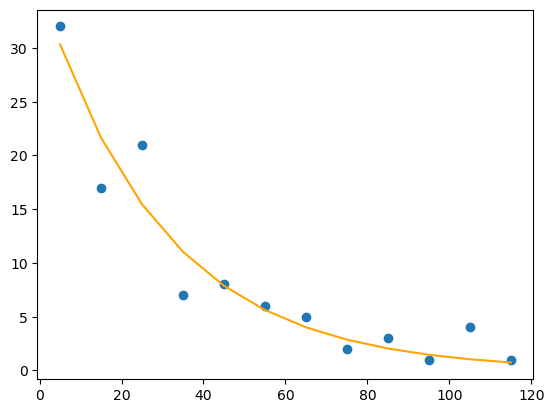

In [28]:
plt.scatter(xd, yd)
plt.plot(x_new, y_new, color = 'orange')

In [29]:
def r_sqr(xd, yd, y_new):
    cima = 0
    baixo = 0
    mean = np.mean(yd)
    for i in range(len(xd)):
        cima += (yd[i] - y_new[i])**2
        baixo += (yd[i] - mean)**2
    return 1 - (cima/baixo)

In [30]:
r_sqr(xd, yd, y_new)

0.9171636070691509

In [31]:
### Valor de vida média
a, b = param

meia = 1/b
meia

## O valor ainda está na casa dos 20, mas diverge consideravelmente do 24ns 

29.674854146824625

### Regressão linear e o método dos mínimos quadráticos

In [32]:
def m(x,y):
    cima = 0
    baixo = 0
    for i in range(len(x)):
        cima += x[i]*(y[i] - np.mean(y))
        baixo += x[i]*(x[i] - np.mean(x))
    
    return cima/baixo

def a(x,y):
    return np.mean(y) - m(x,y)*np.mean(x)

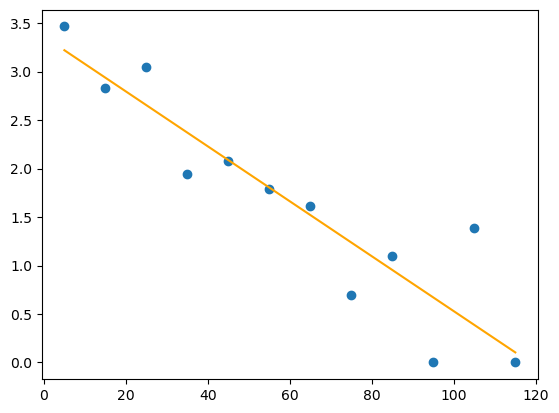

In [43]:
log_yd = np.log(yd)
x_ajuste = np.linspace(min(xd), max(xd), len(xd))
y_ajuste = a(xd,log_yd) + m(xd,log_yd)*xd


plt.scatter(xd, log_yd)
plt.plot(x_ajuste, y_ajuste, c = 'orange')

In [44]:
## Comparando os valores dos dados com o modelo usando R2

r_sqr(xd, log_yd, y_ajuste)

0.8399499726509919

In [56]:
meia = -1/m(x_ajuste,y_ajuste)
meia

## Piorou a aproximação, o que faz sentido tendo em vista que o R2 também é pior quando comparado ao
## da questão 1.


35.293515094837296

### Ajuste de dados e erro experimental

In [63]:
def f(e, fr, er, gamma):
    den = (e - er)**2 + gamma**2/4
    return fr/den

In [64]:
scattering = np.loadtxt("scattering.data")

ys = scattering[:,1]
xs = scattering[:,0]

param, pcov = curve_fit(f, xs, ys)

xs_new = np.linspace(min(xs), max(xs), 100)

ys_new = f(xs_new,*param)

In [65]:
param

## Respectivamente f_r, e_r e gamma 

array([ 6.67304211e+04,  7.74883959e+01, -5.60996269e+01])

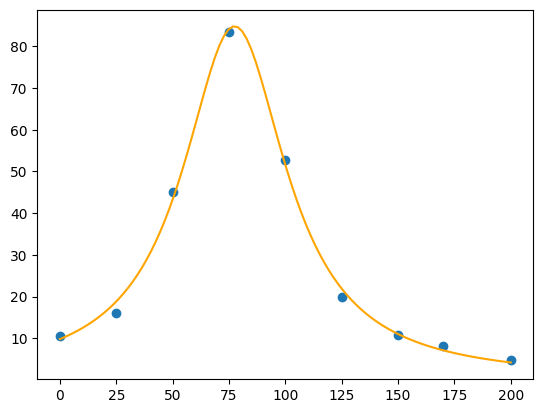

In [50]:
plt.scatter(xs, ys)
plt.plot(xs_new, ys_new, c = 'orange')

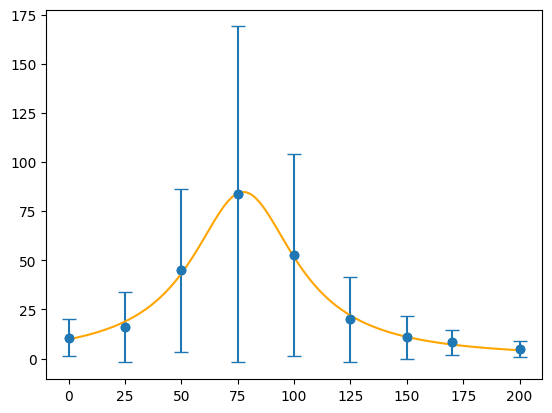

In [56]:
yerr = scattering[:,2]

plt.errorbar(xs,ys, yerr = yerr,fmt = 'o',capsize=5)
plt.scatter(xs, ys)
plt.plot(xs_new, ys_new, c = 'orange')


## Os erros são muito grandes, e pode influenciar nos resultados finais de interpretação

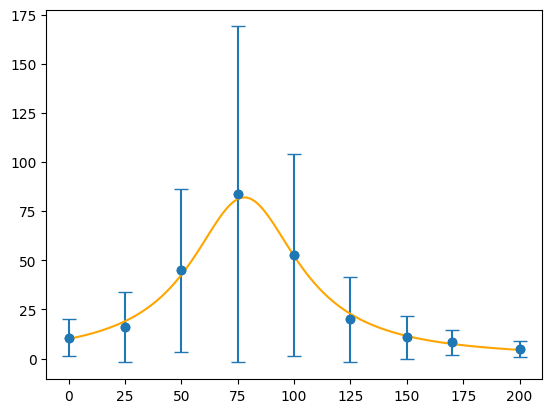

In [61]:
param, pcov = curve_fit(f,xs,ys, sigma = yerr)

xs_new = np.linspace(min(xs), max(xs), 100)

ys_new = f(xs_new,*param)

plt.errorbar(xs,ys, yerr = yerr,fmt = 'o',capsize=5)
plt.scatter(xs, ys)
plt.plot(xs_new, ys_new, c = 'orange')

In [62]:
param
## Respectivamente f_r, e_r e gamma 

array([6.94315786e+04, 7.79925659e+01, 5.81765755e+01])